# Import data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/gojek_app/GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv(file_path)

# Pengecekan Data

In [5]:
df.head()

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3


In [6]:
df.shape

(225002, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225002 entries, 0 to 225001
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   userName    225002 non-null  object
 1   content     225000 non-null  object
 2   score       225002 non-null  int64 
 3   at          225002 non-null  object
 4   appVersion  225002 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.6+ MB


In [8]:
df = df.drop(columns=['userName']);

In [9]:
df['at'] = pd.to_datetime(df['at'], format='%Y-%m-%d %H:%M:%S')

In [10]:
df['score'].unique()

array([1, 3, 4, 5, 2])

In [11]:
df['appVersion'].unique()

array(['4.9.3', '4.9.1', '4.9.0', '4.82.1', '4.81.2', '4.81.1', '4.80.4',
       '4.80.3', '4.80.2', '4.80.1', '4.8.1', '4.79.2', '4.79.1',
       '4.78.3', '4.78.2', '4.78.1', '4.78.0', '4.77.2', '4.77.1',
       '4.76.2', '4.76.1', '4.75.1', '4.74.3', '4.74.2', '4.74.1',
       '4.73.1', '4.72.1', '4.71.3', '4.71.2', '4.70.1', '4.7.4', '4.7.1',
       '4.69.3', '4.69.2', '4.69.1', '4.68.1', '4.67.2', '4.67.1',
       '4.66.1', '4.65.2', '4.65.1', '4.64.2', '4.64.1', '4.63.2',
       '4.63.1', '4.63.0', '4.62.2', '4.62.1', '4.61.1', '4.60.1',
       '4.6.2', '4.6.1', '4.59.1', '4.58.1', '4.57.1', '4.56.1', '4.55.2',
       '4.55.1', '4.54.2', '4.54.1', '4.53.1', '4.52.2', '4.52.1',
       '4.52.0', '4.51.1', '4.50.1', '4.5.2', '4.5.1', '4.49.2', '4.49.1',
       '4.49.0', '4.48.1', '4.47.1', '4.46.2', '4.46.1', '4.45.1',
       '4.44.1', '4.43.3', '4.43.2', '4.43.1', '4.42.2', '4.42.1',
       '4.41.1', '4.40.1', '4.4.1', '4.4.0', '4.39.2', '4.39.1', '4.39.0',
       '4.38.2', '4.38.1

In [12]:
df.isna().sum()

content       2
score         0
at            0
appVersion    0
dtype: int64

# Melakukan pengecekan Distribusi data

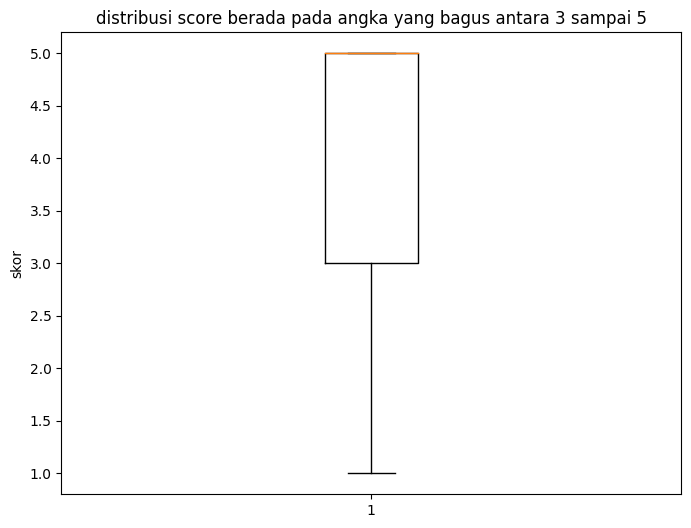

In [13]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['score'])
plt.ylabel('skor')
plt.title('distribusi score berada pada angka yang bagus antara 3 sampai 5')
plt.show()

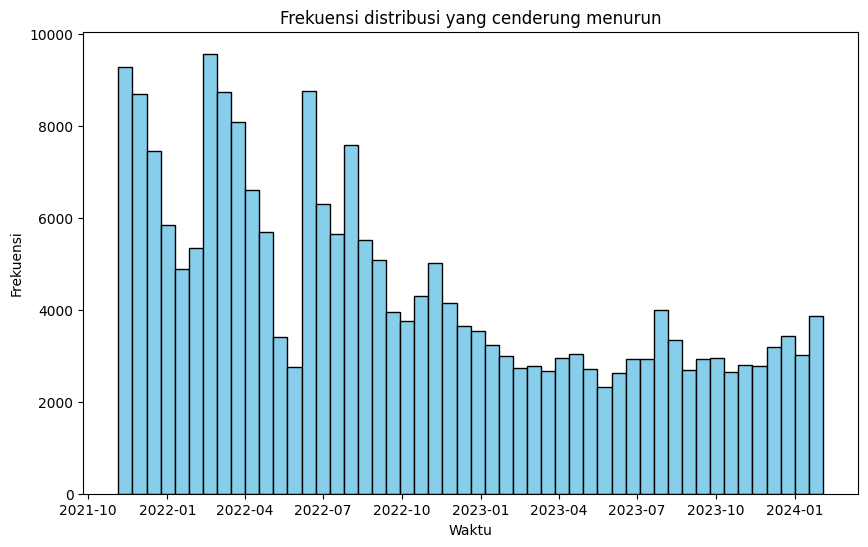

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['at'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Waktu')
plt.ylabel('Frekuensi')
plt.title('Frekuensi distribusi yang cenderung menurun')
plt.show()

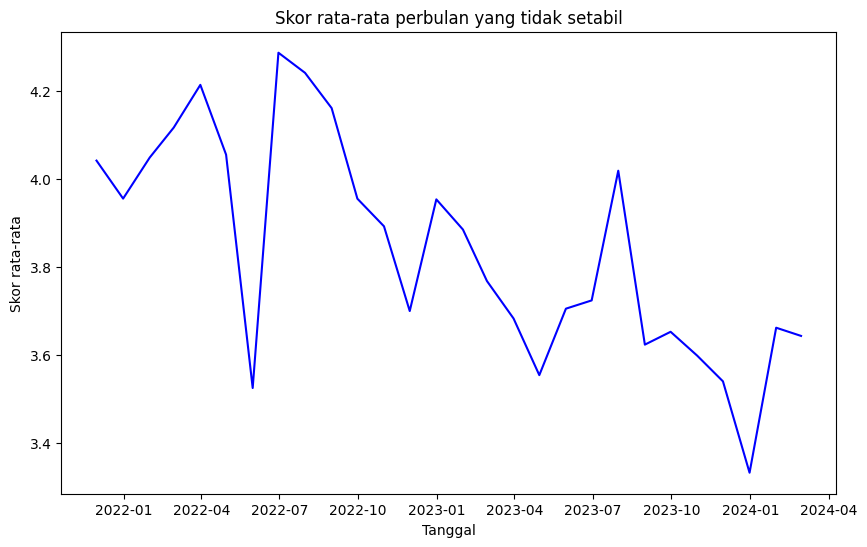

In [15]:
df_indexed = df.set_index('at')
daily_avg_score = df_indexed['score'].resample('m').mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_avg_score.index, daily_avg_score.values, color='blue')
plt.title('Skor rata-rata perbulan yang tidak setabil')
plt.xlabel('Tanggal')
plt.ylabel('Skor rata-rata')
plt.show()

In [16]:
df_reset_index = df_indexed.reset_index()

# Melakukan Sentimen analisis

In [17]:
def determine_sentiment(score, threshold):
    if score > threshold:
        return 'Positif'

    else:
        return 'negatif'

In [18]:
threshold = 3
df['Sentiment'] = df['score'].apply(lambda x: determine_sentiment(x, threshold))
print(df.head())

                                             content  score  \
0                            akun gopay saya di blok      1   
1  Lambat sekali sekarang ini bosssku apk gojek g...      3   
2  Kenapa sih dari kemarin sy buka aplikasi gojek...      4   
3  Baru download gojek dan hape baru trus ditop u...      1   
4                                             Mantap      5   

                   at appVersion Sentiment  
0 2022-01-21 10:52:12      4.9.3   negatif  
1 2021-11-30 15:40:38      4.9.3   negatif  
2 2021-11-29 22:58:12      4.9.3   Positif  
3 2022-09-03 15:21:17      4.9.3   negatif  
4 2022-01-15 10:05:27      4.9.3   Positif  


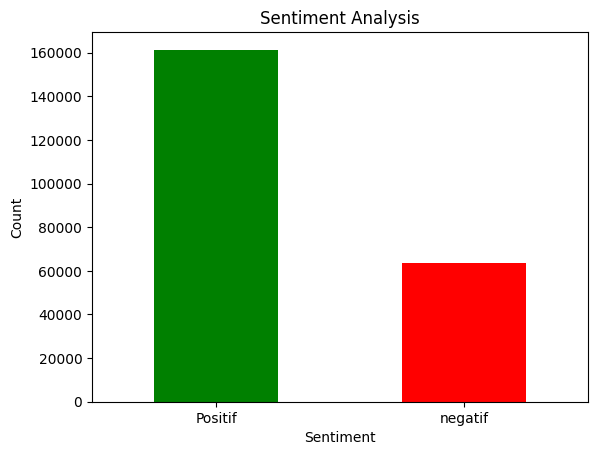

In [19]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [20]:
sentiment_counts_over_time = df.groupby([df['at'].dt.strftime('%Y-%m'), 'Sentiment']).size().unstack(fill_value=0)
positive_counts = sentiment_counts_over_time['Positif']
negative_counts = sentiment_counts_over_time['negatif']

x = positive_counts.index

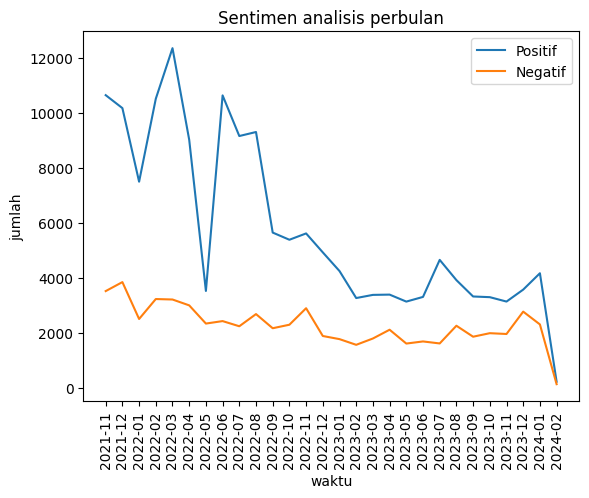

In [21]:
plt.plot(x, positive_counts, label="Positif")
plt.plot(x, negative_counts, label="Negatif")
plt.xlabel("waktu")
plt.ylabel("jumlah")
plt.title("Sentimen analisis perbulan")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [22]:
df[['Major', 'Minor', 'Revisi']] = df['appVersion'].str.split('.', expand=True)
df['Versi_app'] = 'v' + df['Major'] + '.' + df['Minor']
avg_score_by_version = df.groupby('Versi_app')['score'].mean()

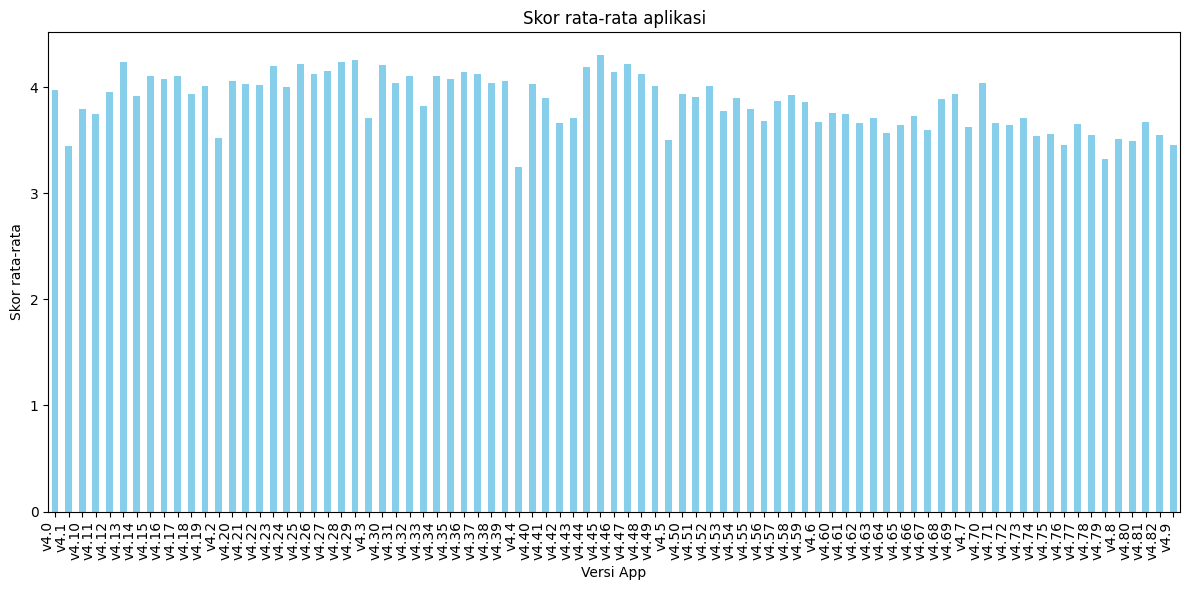

In [23]:
plt.figure(figsize=(12, 6))
avg_score_by_version.plot(kind='bar', color='skyblue')
plt.title('Skor rata-rata aplikasi')
plt.xlabel('Versi App')
plt.ylabel('Skor rata-rata')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [24]:
df['Year'] = df['at'].dt.year
df['Month'] = df['at'].dt.month
df['Day'] = df['at'].dt.day
comments_per_day = df.groupby(['Year', 'Month', 'Day']).size()

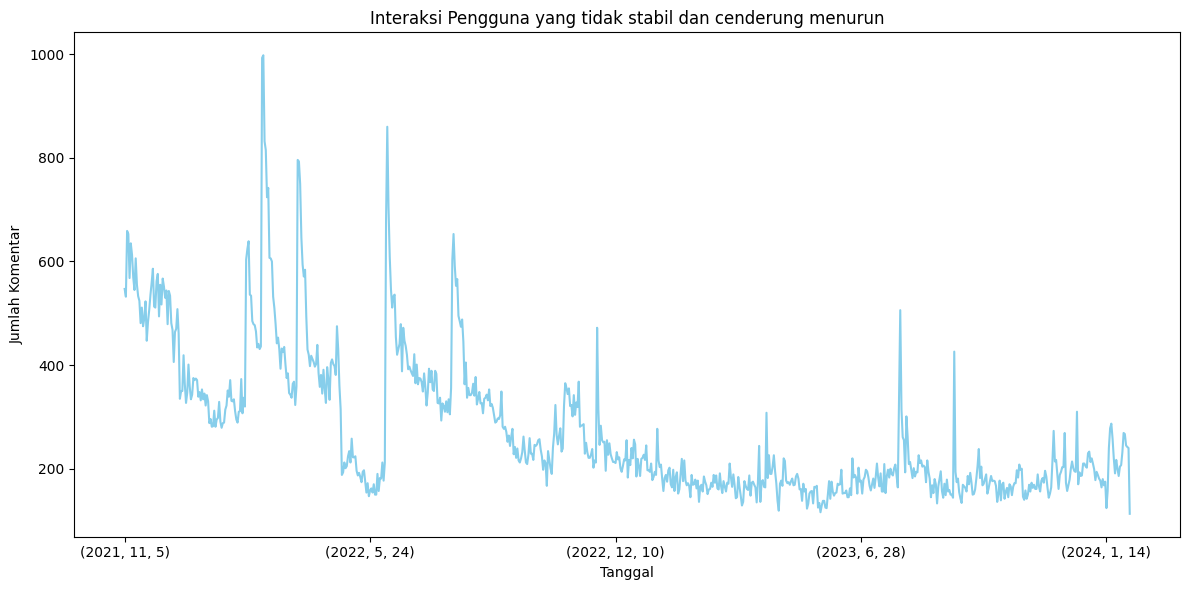

In [25]:
plt.figure(figsize=(12, 6))
comments_per_day.plot(color='skyblue')
plt.title('Interaksi Pengguna yang tidak stabil dan cenderung menurun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Komentar')

plt.tight_layout()
plt.show()

# Korelasi

In [26]:
encoded_appVersion = pd.get_dummies(df['appVersion'], prefix='appVersion')
df_encoded = pd.concat([df['score'], encoded_appVersion], axis=1)
correlation_matrix = df_encoded.corr()

In [27]:
skor_korelasi = correlation_matrix['score'].loc[encoded_appVersion.columns]
skor_korelasi_f = skor_korelasi.sort_values(ascending=False)

print(skor_korelasi_f)
## app version tidak berpengaruh ke penialaian

appVersion_4.45.1    0.036105
appVersion_4.47.1    0.030032
appVersion_4.36.1    0.026487
appVersion_4.34.1    0.025192
appVersion_4.30.1    0.023406
                       ...   
appVersion_4.75.1   -0.024850
appVersion_4.76.2   -0.025368
appVersion_4.78.3   -0.030892
appVersion_4.80.4   -0.032489
appVersion_4.79.2   -0.032769
Name: score, Length: 145, dtype: float64


In [28]:
k_skor_konten = df['score'].corr(df['content'].str.len())
print("Semakin panjang konten semakin rendah SKOR yang diperoleh:", k_skor_konten)

Semakin panjang konten semakin rendah SKOR yang diperoleh: -0.5026859376077383


# pemrosesan teks

In [29]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [30]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [31]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('indonesian') + stopwords.words('english')+ ["yg", "gak", "ngisi", "udah", "d", "sih", "nya", "srg", "utk", "byk", "gk", "ga", "aja", "tp", "udh","ya","sy", "gw","klo", " dah"])

In [32]:
def process_text(text):
    if isinstance(text, str):
        tokens = tokenizer.tokenize(text.lower())
        tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        processed_text = ' '.join(tokens)
        return processed_text
    else:
        return ""

In [33]:
df['processed_content'] = df['content'].apply(process_text)
print(df)

                                                  content  score  \
0                                 akun gopay saya di blok      1   
1       Lambat sekali sekarang ini bosssku apk gojek g...      3   
2       Kenapa sih dari kemarin sy buka aplikasi gojek...      4   
3       Baru download gojek dan hape baru trus ditop u...      1   
4                                                  Mantap      5   
...                                                   ...    ...   
224997  Gofood Biaya lain2ya gak ngotak mending hujan2...      1   
224998                                            Yok lah      5   
224999                                           Sempurna      5   
225000  GOJEK LAMA LAMA GAK JELAS  LAGI PESEN MASA MAP...      1   
225001                                               Good      5   

                        at appVersion Sentiment Major Minor Revisi Versi_app  \
0      2022-01-21 10:52:12      4.9.3   negatif     4     9      3      v4.9   
1      2021-11-30 15:40

# word cloud

In [34]:
from wordcloud import WordCloud
positive_text = ' '.join(df[df['Sentiment'] == 'Positif']['processed_content'])
negative_text = ' '.join(df[df['Sentiment'] == 'negatif']['processed_content'])

def count_words(text):
    word_freq = {}
    words = text.split()
    for word in words:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1
    return word_freq

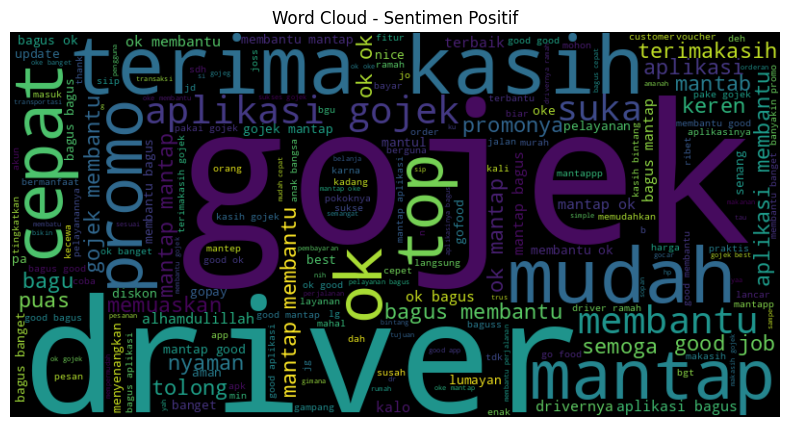

In [35]:
positive_word_freq = count_words(positive_text)
wordcloud_positive = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Sentimen Positif')
plt.axis('off')
plt.show()

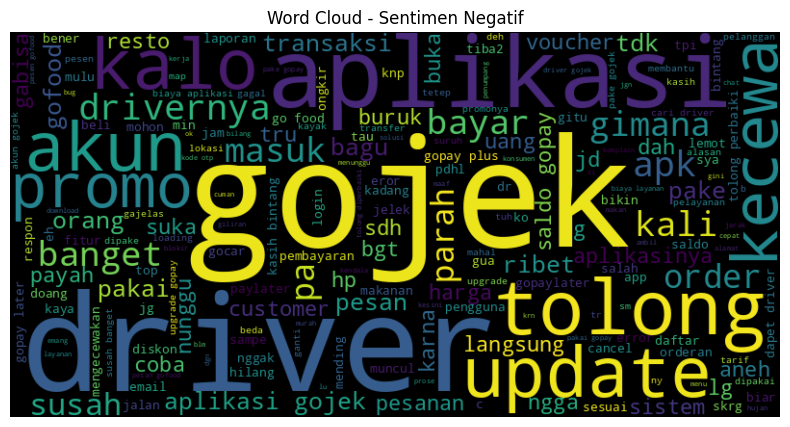

In [36]:
wordcloud_negative = WordCloud(width=800, height=400, background_color='Black').generate(negative_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Sentimen Negatif')
plt.axis('off')
plt.show()

# spliting data untuk algoritma Support Vector Machine (SVM)

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
X = df['processed_content']
y = df['Sentiment']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ekstraksi fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Support Vector Machine (SVM)

In [40]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

#prediksi data pengujian

In [41]:
y_pred = svm_model.predict(X_test_tfidf)

#evaluasi model

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9032243727917157
Classification Report:
              precision    recall  f1-score   support

     Positif       0.93      0.93      0.93     32230
     negatif       0.83      0.83      0.83     12771

    accuracy                           0.90     45001
   macro avg       0.88      0.88      0.88     45001
weighted avg       0.90      0.90      0.90     45001



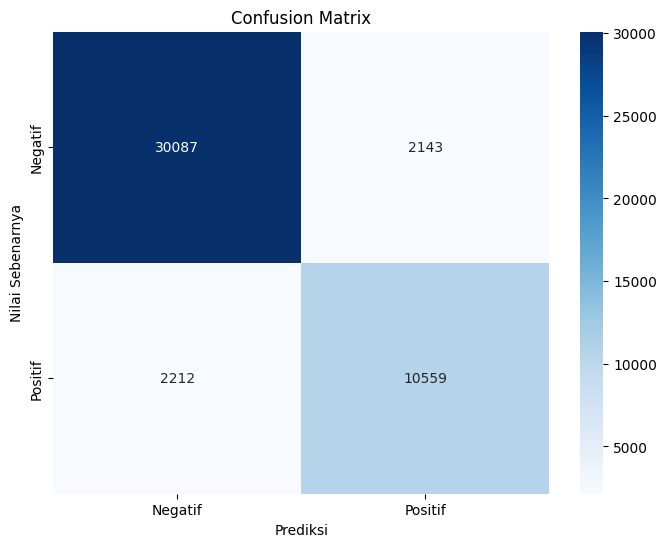

In [43]:
confusion_matrix = np.array([[30087, 2143],[2212, 10559]])

labels = ['Negatif', 'Positif']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# Contoh tes
test1 = 'promo gojek mantap'
test2 = 'promo gojek mantap, tapi aplikasi sering bermasalah'

# Prediksi untuk contoh tes
test1_pred = svm_model.predict(vectorizer.transform([test1]))
test2_pred = svm_model.predict(vectorizer.transform([test2]))

print("Prediksi untuk test1:", test1_pred)
print("Prediksi untuk test2:", test2_pred)

Prediksi untuk test1: ['Positif']
Prediksi untuk test2: ['negatif']
